In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
108,26,86000,0
72,20,23000,0
123,35,53000,0
153,36,50000,0
217,40,78000,0


## Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [9]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [13]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

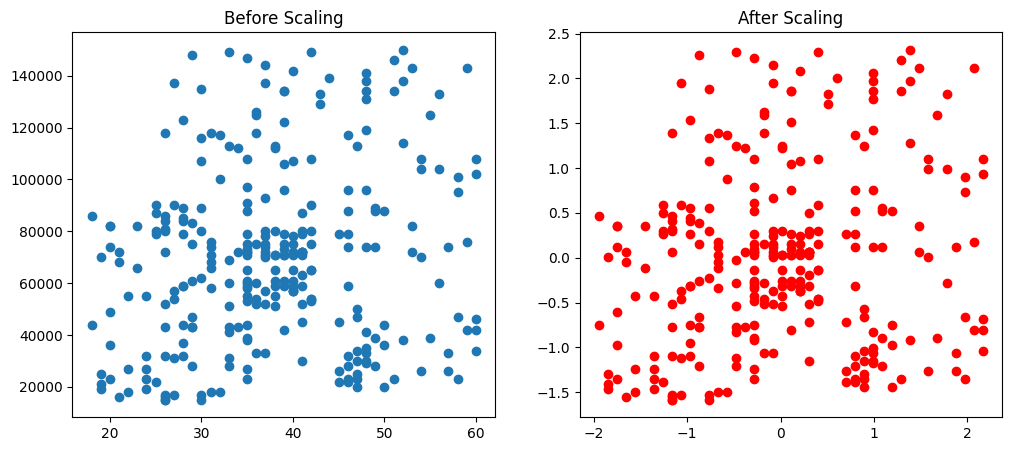

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
# plt.show()

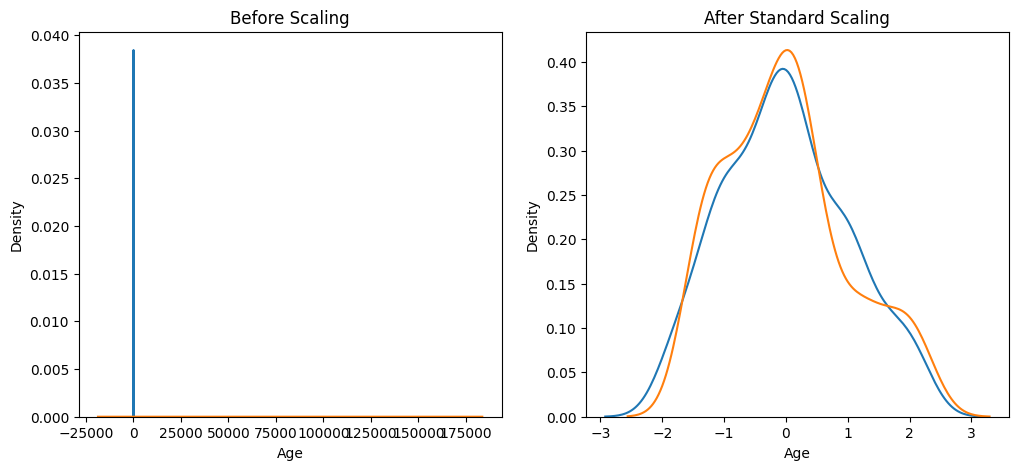

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

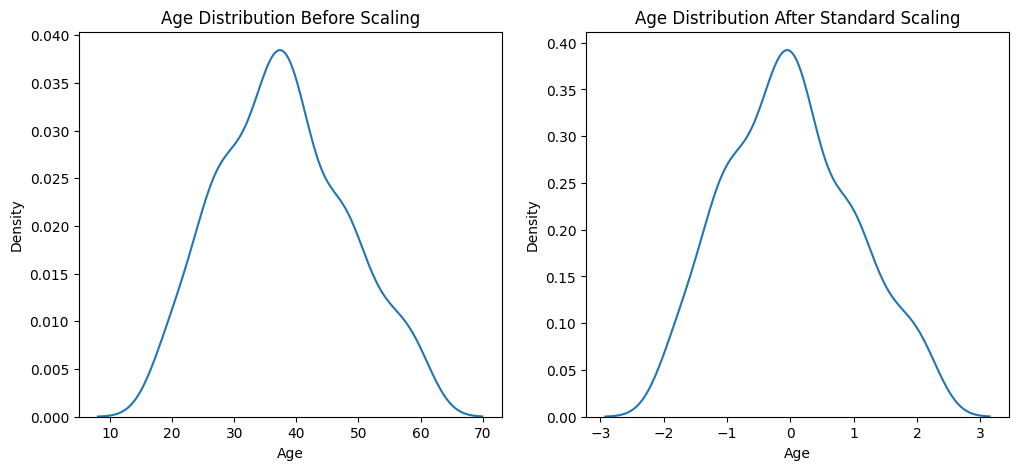

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

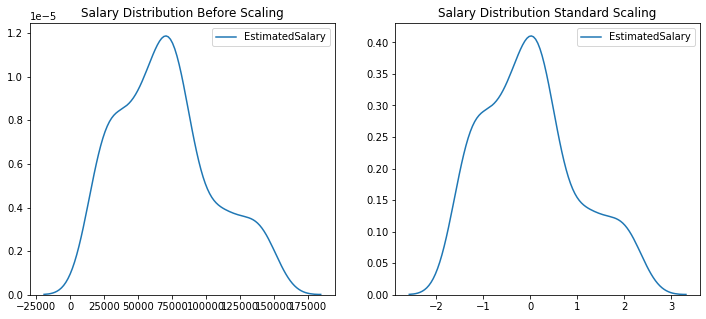

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Standard Scaler from Scratch

In [59]:
class standard_scaler:
    def __init__(self) -> None:
        self.mean_ = list()
        self.std_ = list()
        self.cols = list()
        
        
    def fit(self, train_df):
        self.mean_ = train_df.mean().values
        self.std_ = train_df.std(ddof=0).values
        self.cols = train_df.columns
        # print("Fitted means:", self.mean_)
        # print("Fitted stds:", self.std_)
    
    def transform(self, test_df):
        
        if len(self.cols) != len(test_df.columns):
            raise ValueError("Number of columns in test data must match the number of columns in training data.")
        
        test_df = test_df.copy()
        for i, col in enumerate(test_df.columns):
            test_df[col] = (test_df[col] - self.mean_[i])/self.std_[i]
            
        return test_df
    
    def fit_transform(self, train_df):
        self.fit(train_df)
        return self.transform(train_df)

In [60]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,90,250000,1
402,95,350000,1
403,5,1000,0
404,90,250000,1


In [66]:
my_scaler = standard_scaler()

my_scaler.fit(df.drop('Purchased', axis=1))
scaled_df = my_scaler.transform(df.drop('Purchased', axis=1))
scaled_df

,Age,EstimatedSalary
0,-1.592848,-1.274091
1,-0.253932,-1.249902
2,-1.007072,-0.693556
3,-0.923390,-0.354910
4,-1.592848,0.104680
...,...,...
401,4.348590,4.313559
402,4.767001,6.732456
403,-2.764399,-1.709492
404,4.348590,4.313559


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df.drop('Purchased', axis = 1))

# transform train and test sets
scikit_scaled = scaler.transform(df.drop('Purchased', axis = 1))
scikit_scaled = pd.DataFrame(scikit_scaled, columns=df.drop('Purchased', axis = 1).columns)
scikit_scaled

,Age,EstimatedSalary
0,-1.592848,-1.274091
1,-0.253932,-1.249902
2,-1.007072,-0.693556
3,-0.923390,-0.354910
4,-1.592848,0.104680
...,...,...
401,4.348590,4.313559
402,4.767001,6.732456
403,-2.764399,-1.709492
404,4.348590,4.313559


# Why scaling is important?

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [19]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [25]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [27]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [28]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [38]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],axis = 0, ignore_index=True)

In [39]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,90,250000,1
402,95,350000,1
403,5,1000,0
404,90,250000,1


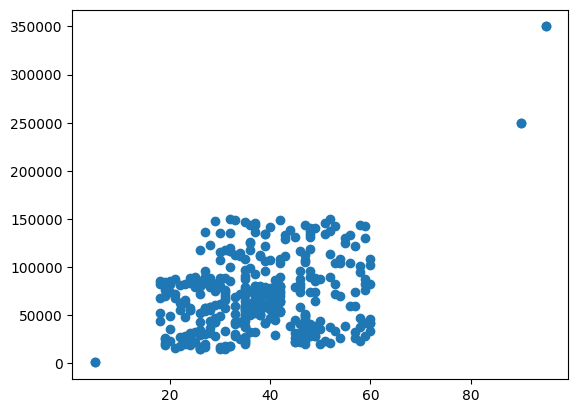

In [40]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((284, 2), (122, 2))

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

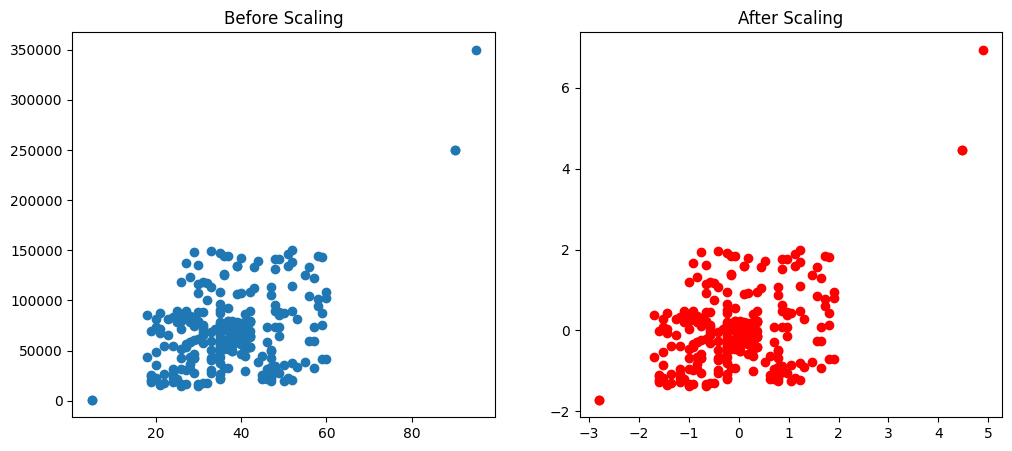

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

There is no change to the outlier, outlier is still an outlier